**Ridge Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
df = load_diabetes()
X= df.data
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=45)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print("r2 score: ", r2_score(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score:  0.5188118914964637
RMSE:  48.72710829141399


In [ ]:
from sklearn.linear_model import Ridge
lr = Ridge(0.01)
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

In [ ]:
print("r2 score: ", r2_score(y_test,y_pred1))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred1)))

r2 score:  0.5230848310448114
RMSE:  48.51027804490331


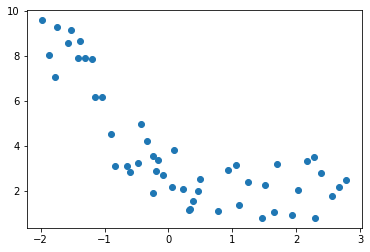

In [ ]:
#overfitting/underfitting
X1 = 5* np.random.rand(50,1)-2
X2 = 0.7 * X1**2-2*X1 +3 + np.random.randn(50,1)
plt.scatter(X1,X2)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.20696e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


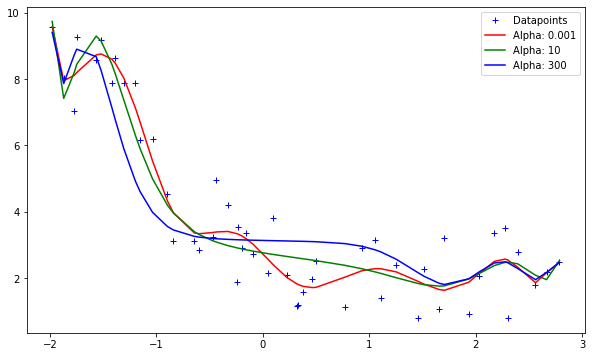

In [ ]:
from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import PolynomialFeatures 
def get_preds_ridge(x1,x2,alpha):
  model = Pipeline([
                    ('poly_features', PolynomialFeatures(degree =15)),
                    ('ridge',Ridge(alpha= alpha))
  ])
  model.fit(x1,x2)
  return model.predict(x1) 
alphas =[0.001,10,300]
cs = ['r','g','b']
plt.figure(figsize=(10,6))
plt.plot(X1,X2, 'b+',label = 'Datapoints')
for alpha, c in zip(alphas,cs):
    preds = get_preds_ridge(X1,X2,alpha)
    plt.plot(sorted(X1[:,0]), preds[np.argsort(X1[:,0])], c, label = 'Alpha: {}'.format(alpha))
plt.legend()
plt.show()    

In [ ]:
# high alpha -> showing underfitting
# low alpha -> overfitting

**Implemetation**


In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
import numpy as np 

In [ ]:
X,y = make_regression(n_samples=100, n_features=1, n_informative =1, n_targets =1, 
                      noise=20, random_state=10)

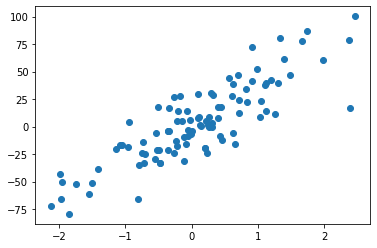

In [ ]:
plt.scatter(X,y)

In [ ]:
lr1 = LinearRegression()
lr1.fit(X,y)
print(lr1.coef_)
print(lr1.intercept_)

[31.34493951]
1.0560830217516393


In [ ]:
from sklearn.linear_model import Ridge 

In [ ]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[28.31692669]
1.2965576951719218


In [ ]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[15.14738848]
2.342438471999783


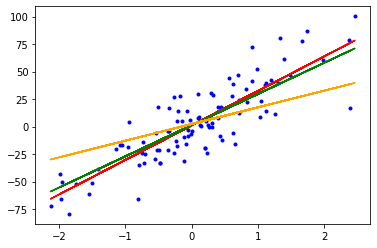

In [ ]:
plt.plot(X,y,'b.')
plt.plot(X,lr1.predict(X), color='r', label ='alpha=0')
plt.plot(X,rr.predict(X), color='g', label ='alpha=10')
plt.plot(X,rr1.predict(X), color='orange', label ='alpha=100')

In [ ]:
class Ridge1:
  def __init__(self,alpha=0.1):
    self.alpha =alpha 
    self.m= None
    self.b = None 
  def fit(self,X_train,y_train):
    num=0
    dem =0
    for i in range(X_train.shape[0]):
      num +=(y_train[i]-y_train.mean())*(X_train[i]-X_train.mean())
      dem += (X_train[i]-X_train.mean())**2 +alpha 
    self.m = num/dem 
    self.b = y_train.mean() - self.m*X_train.mean()
    return self.m, self.b 
  def predict(X_test):
    return X_test*self.m + self.b 
reg = Ridge1()
reg.fit(X,y)  

(array([0.09740537]), array([3.53765791]))

In [ ]:
class RR2:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
        return 
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [ ]:
from sklearn.datasets import load_diabetes 
from sklearn.metrics import r2_score 

In [ ]:
X,y = load_diabetes(return_X_y=True)
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =42)

In [ ]:
rr2 = RR2()
rr2.fit(X_train,y_train)
y_pred = rr2.predict(X_test) 
print(r2_score(y_test, y_pred)) 
print(rr2.coef_)
print(rr2.intercept_)

0.46085316782973285
[  42.85374471 -205.49571833  505.08633402  317.09877365 -108.49829825
  -86.2387599  -190.36567438  151.7067317   392.28728164   79.90836219]
151.45860243385388


**Using Gradient descent**

In [ ]:
class RidgeGD:
    
    def __init__(self,epochs=100,learning_rate =0.1,alpha=0.1):
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_

In [ ]:
reg = RidgeGD(epochs=500,alpha=0.001,learning_rate=0.005)

In [ ]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.45922562409620993
[  43.37045483 -192.03844748  496.43371401  319.37856976  -64.42806489
 -113.19505857 -213.90825527  144.861197    367.67858381  119.56862435]
151.40457302137384


In [ ]:
9